In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
italy = pd.read_excel("Italy-10year-government-yield.xlsx")

# Display first few rows
italy.head()


,Data dell'osservazione,Rendimento lordo BTP decennale benchmark
0,2025-09-30,"3,55726"
1,2025-09-29,"3,57364"
2,2025-09-28,NaN
3,2025-09-27,NaN
4,2025-09-26,"3,6125"


In [7]:
italy = italy.rename(columns={
    "Data dell’osservazione": "Date",
    "Rendimento lordo BTP decennale benchmark": "Italy_10y"
})


In [9]:
italy.head()


,Data dell'osservazione,Italy_10y
0,2025-09-30,"3,55726"
1,2025-09-29,"3,57364"
2,2025-09-28,NaN
3,2025-09-27,NaN
4,2025-09-26,"3,6125"


In [11]:
italy.columns


Index(['Data dell'osservazione', 'Italy_10y'], dtype='object')

In [13]:
italy = italy.rename(columns={
    "Data dell'osservazione": "Date",
    "Rendimento lordo BTP decennale benchmark": "Italy_10y"
})


In [15]:
italy.head()


,Date,Italy_10y
0,2025-09-30,"3,55726"
1,2025-09-29,"3,57364"
2,2025-09-28,NaN
3,2025-09-27,NaN
4,2025-09-26,"3,6125"


In [17]:
import os
os.listdir()


['Q10_bivariate_grid.png',
 '.config',
 'Music',
 'java_error_in_pycharm_10776.log',
 'moncorge_estimation.csv',
 '.condarc',
 'Untitled1.ipynb',
 '.DS_Store',
 '.CFUserTextEncoding',
 'cours python.ipynb',
 'Germany-10year-government-yield.csv',
 '.xonshrc',
 'Q10_YD_vs_LTDTA.png',
 'Untitled3.ipynb',
 'Untitled.ipynb',
 '.zshrc',
 'Q10_YD_vs_GEMPL.png',
 'python macro.ipynb',
 'Untitled4.ipynb',
 'macro.ipynb',
 'Pictures',
 'defaut2000.xls',
 'moncorge_clean_full.csv',
 'Italy-10year-government-yield.xlsx',
 'Q10_YD_vs_TDTA.png',
 '.zsh_history',
 'Q10_YD_vs_RETA.png',
 'ScoringHomework.ipynb',
 'Untitled2.ipynb',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 'Belgium-10year-government-yield.numbers',
 'Updated Homework scoring.ipynb',
 '.cups',
 'PycharmProjects',
 'Public',
 'Scoring Python.py',
 '.tcshrc',
 '.anaconda',
 'moncorge_validation.csv',
 'France-10year-government-yield.numbers',
 'Movies',
 'Applications',
 'Q10_YD_vs_EBITA.png',
 '.Trash',
 '.ipynb_checkpoints

In [33]:
import pandas as pd

# Load and skip metadata
germany = pd.read_csv(
    "Germany-10year-government-yield.csv",
    sep=';',
    encoding='utf-8',
    skiprows=8
)

# Drop rows that are comments or not dates
germany = germany[germany.iloc[:, 0].str.match(r"\d{4}-\d{2}-\d{2}", na=False)]

# Rename columns properly
germany = germany.rename(columns={
    germany.columns[0]: "Date",
    germany.columns[1]: "Germany_10y"
})

# Convert types
germany["Date"] = pd.to_datetime(germany["Date"])
germany["Germany_10y"] = pd.to_numeric(germany["Germany_10y"], errors='coerce')

# Fill missing values (weekends)
germany = germany.fillna(method='ffill')

# Display
germany.head()



/var/folders/bv/2x6q3g9d649cgcyxqyzc_bf00000gp/T/ipykernel_31818/552223122.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  germany = germany.fillna(method='ffill')


,Date,Germany_10y,Unnamed: 2
0,2014-12-29,0.57,NaN
1,2014-12-30,0.56,NaN
2,2014-12-31,0.56,Missing value; holiday or weekend
3,2015-01-01,0.56,Missing value; holiday or weekend
4,2015-01-02,0.54,Missing value; holiday or weekend


In [29]:
print(germany.head())
print(germany.columns)


  last update 2025-10-24 12:11:56                         Unnamed: 2
0  2014-12-29                0.57                                NaN
1  2014-12-30                0.56                                NaN
2  2014-12-31                   .  Missing value; holiday or weekend
3  2015-01-01                   .  Missing value; holiday or weekend
4  2015-01-02                0.54                                NaN
Index(['last update', '2025-10-24 12:11:56', 'Unnamed: 2'], dtype='object')


In [35]:
# Drop useless columns (like "Unnamed: 2")
germany = germany.drop(columns=[col for col in germany.columns if "Unnamed" in col])

# Forward fill missing values (weekends)
germany = germany.ffill()

# Verify
germany.head()


,Date,Germany_10y
0,2014-12-29,0.57
1,2014-12-30,0.56
2,2014-12-31,0.56
3,2015-01-01,0.56
4,2015-01-02,0.54


In [37]:
import pandas as pd

# Load the Banque de France file
france = pd.read_csv(
    "France-10year-government-yield.csv",  # Adjust name if needed
    sep=';',              # Banque de France uses ';' as separator
    encoding='utf-8'
)

# Display first rows and column names
print(france.head())
print(france.columns)


        Title:     Constant maturity rate 10 years
0  Series key:  FM.D.FR.EUR.FR2.BB.FRMOYTEC10.HSTA
1        Unit:                        Percent (PC)
2  Multiplier:                           Units (0)
3  Collection:                   End of period (E)
4      Source:    Bank of France, MTS France (MTS)
Index(['Title:', 'Constant maturity rate 10 years'], dtype='object')


In [39]:
france = pd.read_csv(
    "France-10year-government-yield.csv",
    sep=';',
    encoding='utf-8',
    skiprows=6  # skips metadata lines
)

print(france.head())
print(france.columns)


   2025-10-24  3.42
0  2025-10-23  3.36
1  2025-10-22  3.33
2  2025-10-21  3.34
3  2025-10-20  3.38
4  2025-10-19     -
Index(['2025-10-24', '3.42'], dtype='object')


In [41]:
# Keep only date and yield columns
france = france.rename(columns={
    france.columns[0]: "Date",
    france.columns[1]: "France_10y"
})

# Convert types
france["Date"] = pd.to_datetime(france["Date"])
france["France_10y"] = pd.to_numeric(france["France_10y"], errors='coerce')

# Fill missing (weekends)
france = france.ffill()

# Drop unnecessary columns
france = france.drop(columns=[col for col in france.columns if "Unnamed" in col])

# Preview
france.head()


,Date,France_10y
0,2025-10-23,3.36
1,2025-10-22,3.33
2,2025-10-21,3.34
3,2025-10-20,3.38
4,2025-10-19,3.38


In [51]:
import pandas as pd

belgium = pd.read_csv(
    "Belgium-10year-government-yield.csv",
    sep=';',
    encoding='utf-8',
    skiprows=6
)

# Rename columns properly
belgium = belgium.rename(columns={
    belgium.columns[1]: "Date",
    belgium.columns[2]: "Belgium_10y"
})

# Keep only relevant columns (drop the '10 years' label column)
belgium = belgium[["Date", "Belgium_10y"]]

# Convert types
belgium["Date"] = pd.to_datetime(belgium["Date"], format="%Y-%m-%d", errors="coerce")
belgium["Belgium_10y"] = pd.to_numeric(belgium["Belgium_10y"], errors="coerce")

# Fill weekends (forward fill)
belgium = belgium.ffill()

# Verify
belgium.head()


,Date,Belgium_10y
0,2015-01-07,0.92
1,2015-01-08,0.95
2,2015-01-09,0.93
3,2015-01-12,0.90
4,2015-01-13,0.87


In [69]:
import pandas as pd

# --- Load Excel properly (reset index to capture the first column) ---
spain = pd.read_excel(
    "Spain-10year-government-yield.xlsx",
    skiprows=6,          # skip metadata rows
    header=None           # avoid treating any row as header
)

# Rename columns manually (first col = date, second = yield)
spain.columns = ["Date", "Spain_10y"]

# Ensure 'Date' is string and clean it
spain["Date"] = spain["Date"].astype(str).str.strip()

# Replace Spanish month abbreviations with English equivalents
spain["Date"] = spain["Date"].replace({
    "ENE": "JAN", "FEB": "FEB", "MAR": "MAR", "ABR": "APR", "MAY": "MAY", "JUN": "JUN",
    "JUL": "JUL", "AGO": "AUG", "SEP": "SEP", "OCT": "OCT", "NOV": "NOV", "DIC": "DEC"
}, regex=True)

# Now convert to datetime
spain["Date"] = pd.to_datetime(spain["Date"], format="%d %b %Y", errors="coerce")

# Convert yields to numeric
spain["Spain_10y"] = pd.to_numeric(spain["Spain_10y"], errors="coerce")

# Fill missing weekend/holiday values
spain = spain.ffill()

# Verify
print(spain.head())
print(spain.info())


        Date  Spain_10y
0 2014-12-31      1.610
1 2015-01-01      1.610
2 2015-01-02      1.540
3 2015-01-05      1.541
4 2015-01-06      1.582
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2824 non-null   datetime64[ns]
 1   Spain_10y  2824 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.3 KB
None


In [71]:
print("France stats:\n", france["France_10y"].describe(), "\n")
print("Germany stats:\n", germany["Germany_10y"].describe(), "\n")
print("Belgium stats:\n", belgium["Belgium_10y"].describe(), "\n")
print("Spain stats:\n", spain["Spain_10y"].describe(), "\n")
print("Italy stats:\n", italy["Italy_10y"].describe(), "\n")


France stats:
 count    3951.000000
mean        1.215194
std         1.250360
min        -0.417000
25%         0.194500
50%         0.759000
75%         2.755000
max         3.620000
Name: France_10y, dtype: float64 

Germany stats:
 count    3953.000000
mean        0.795330
std         1.116668
min        -0.830000
25%        -0.100000
50%         0.400000
75%         2.170000
max         2.970000
Name: Germany_10y, dtype: float64 

Belgium stats:
 count    11579.000000
mean         1.718159
std          1.415676
min         -0.510000
25%          0.520000
50%          1.410000
75%          3.000000
max          5.840000
Name: Belgium_10y, dtype: float64 

Spain stats:
 count    2824.000000
mean        1.753048
std         1.119175
min        -0.011000
25%         0.912250
50%         1.535000
75%         3.036000
max         4.052000
Name: Spain_10y, dtype: float64 

Italy stats:
 count       2728
unique      2707
top       2,8287
freq           2
Name: Italy_10y, dtype: object 



In [73]:
# Convert commas to dots and cast to float
italy["Italy_10y"] = italy["Italy_10y"].astype(str).str.replace(',', '.')
italy["Italy_10y"] = pd.to_numeric(italy["Italy_10y"], errors='coerce')

# Verify the result
print(italy["Italy_10y"].describe())
print(italy.dtypes)


count    2728.000000
mean        2.392114
std         1.189680
min         0.438120
25%         1.399430
50%         2.096965
75%         3.558053
max         5.033480
Name: Italy_10y, dtype: float64
Date          object
Italy_10y    float64
dtype: object


In [77]:
import pandas as pd

# --- Compute descriptive statistics for each country ---
desc_france = france["France_10y"].describe()
desc_germany = germany["Germany_10y"].describe()
desc_belgium = belgium["Belgium_10y"].describe()
desc_italy = italy["Italy_10y"].astype(str).str.replace(",", ".")  # fix commas if needed
desc_italy = pd.to_numeric(desc_italy, errors="coerce").describe()
desc_spain = spain["Spain_10y"].describe()

# --- Combine all into one table ---
summary_stats = pd.concat(
    [desc_france, desc_germany, desc_belgium, desc_italy, desc_spain],
    axis=1
)

# --- Rename columns for clarity ---
summary_stats.columns = ["France", "Germany", "Belgium", "Italy", "Spain"]

# --- Display neatly ---
print(summary_stats)


            France      Germany       Belgium        Italy        Spain
count  3951.000000  3953.000000  11579.000000  2728.000000  2824.000000
mean      1.215194     0.795330      1.718159     2.392114     1.753048
std       1.250360     1.116668      1.415676     1.189680     1.119175
min      -0.417000    -0.830000     -0.510000     0.438120    -0.011000
25%       0.194500    -0.100000      0.520000     1.399430     0.912250
50%       0.759000     0.400000      1.410000     2.096965     1.535000
75%       2.755000     2.170000      3.000000     3.558053     3.036000
max       3.620000     2.970000      5.840000     5.033480     4.052000


In [79]:
print(france.columns)
print(germany.columns)
print(belgium.columns)
print(italy.columns)
print(spain.columns)


Index(['Date', 'France_10y'], dtype='object')
Index(['Date', 'Germany_10y'], dtype='object')
Index(['Date', 'Belgium_10y'], dtype='object')
Index(['Date', 'Italy_10y'], dtype='object')
Index(['Date', 'Spain_10y'], dtype='object')


In [81]:
for df in [france, germany, belgium, italy, spain]:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [83]:
merged = (
    france.merge(germany, on="Date", how="outer")
          .merge(belgium, on="Date", how="outer")
          .merge(italy, on="Date", how="outer")
          .merge(spain, on="Date", how="outer")
          .sort_values("Date")
          .ffill()  # forward fill weekends/holidays
)

print(merged.head())
print(merged.info())


        Date  France_10y  Germany_10y  Belgium_10y  Italy_10y  Spain_10y
0 2009-10-29         NaN          NaN         3.80        NaN        NaN
1 2009-10-29         NaN          NaN         3.66        NaN        NaN
2 2009-10-30         NaN          NaN         3.76        NaN        NaN
3 2009-10-30         NaN          NaN         3.67        NaN        NaN
4 2009-11-02         NaN          NaN         3.72        NaN        NaN
<class 'pandas.core.frame.DataFrame'>
Index: 12830 entries, 0 to 12829
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         12830 non-null  datetime64[ns]
 1   France_10y   9358 non-null   float64       
 2   Germany_10y  9360 non-null   float64       
 3   Belgium_10y  12830 non-null  float64       
 4   Italy_10y    9360 non-null   float64       
 5   Spain_10y    9356 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 701.6 KB
None


In [85]:
for col in ["France_10y", "Germany_10y", "Belgium_10y", "Italy_10y", "Spain_10y"]:
    first_valid = merged.loc[merged[col].notna(), "Date"].min()
    print(f"{col} starts on {first_valid.date()}")


France_10y starts on 2014-12-30
Germany_10y starts on 2014-12-29
Belgium_10y starts on 2009-10-29
Italy_10y starts on 2014-12-29
Spain_10y starts on 2014-12-31


In [87]:
# Define the common start date
start_date = "2014-12-29"

# Keep only data from that date onward
merged = merged[merged["Date"] >= start_date].reset_index(drop=True)

# Verify
print(merged.head())
print(merged.info())


        Date  France_10y  Germany_10y  Belgium_10y  Italy_10y  Spain_10y
0 2014-12-29         NaN         0.57         0.93    1.99915        NaN
1 2014-12-29         NaN         0.57         0.88    1.99915        NaN
2 2014-12-30       0.858         0.56         0.91    1.91757        NaN
3 2014-12-30       0.858         0.56         0.85    1.91757        NaN
4 2014-12-31       0.858         0.56         0.91    1.91757       1.61
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9360 non-null   datetime64[ns]
 1   France_10y   9358 non-null   float64       
 2   Germany_10y  9360 non-null   float64       
 3   Belgium_10y  9360 non-null   float64       
 4   Italy_10y    9360 non-null   float64       
 5   Spain_10y    9356 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 438.9 KB
Non

In [89]:
for col in ["France_10y", "Germany_10y", "Belgium_10y", "Italy_10y", "Spain_10y"]:
    first_valid = merged.loc[merged[col].notna(), "Date"].min()
    print(f"{col} starts on {first_valid.date()}")


France_10y starts on 2014-12-30
Germany_10y starts on 2014-12-29
Belgium_10y starts on 2014-12-29
Italy_10y starts on 2014-12-29
Spain_10y starts on 2014-12-31


In [91]:
merged = merged.ffill()


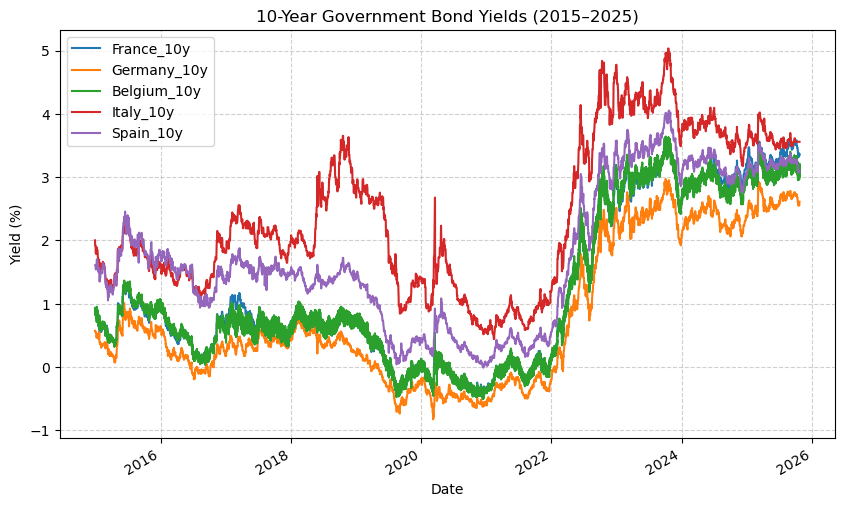

In [93]:
import matplotlib.pyplot as plt

merged.plot(
    x="Date",
    y=["France_10y", "Germany_10y", "Belgium_10y", "Italy_10y", "Spain_10y"],
    figsize=(10,6),
    title="10-Year Government Bond Yields (2015–2025)"
)
plt.ylabel("Yield (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [95]:
# --- Compute descriptive statistics for the aligned data ---
summary_stats_aligned = merged[["France_10y", "Germany_10y", "Belgium_10y", "Italy_10y", "Spain_10y"]].describe()

# --- Display neatly ---
print(summary_stats_aligned)


        France_10y  Germany_10y  Belgium_10y    Italy_10y    Spain_10y
count  9358.000000  9360.000000  9360.000000  9360.000000  9356.000000
mean      1.216711     0.797049     1.191269     2.398609     1.752971
std       1.252192     1.118488     1.234604     1.188697     1.120504
min      -0.417000    -0.830000    -0.510000     0.438120    -0.011000
25%       0.190750    -0.100000     0.180000     1.406280     0.889000
50%       0.758500     0.400000     0.730000     2.103835     1.534000
75%       2.760000     2.170000     2.732500     3.557260     3.040250
max       3.620000     2.970000     3.640000     5.033480     4.052000
